In [4]:
import pandas as pd
df = []
for i in [32,64,128,256,512]:
    df.append(pd.read_csv(f"/Users/qier/MasterThesis_Tokenization/results/1_h{i}.csv").rename(columns={'Unnamed: 0':'language'})[['language','F1-score']])
    
frames = [df[0],df[1]['F1-score'],df[2]['F1-score'],df[3]['F1-score'],df[4]['F1-score']]
DF = pd.concat(frames,axis=1)
DF = DF.set_index('language')
DF.columns = [32,64,128,256,512]
DF

,32,64,128,256,512
language,,,,,
HEBREW,0.996026,0.996840,0.998174,0.998359,0.998584
ARABIC,0.989333,0.989319,0.989008,0.990153,0.988339
PORTUGUESE,0.976800,0.977661,0.976992,0.976704,0.977047
ITALIAN,0.989008,0.994611,0.995506,0.994956,0.993523
FRENCH,0.992079,0.992527,0.992777,0.994647,0.993000
SPANISH,0.997573,0.998692,0.998814,0.998867,0.998220
GERMAN,0.980775,0.980355,0.986640,0.985623,0.984184
ENGLISH,0.889799,0.895449,0.901112,0.901217,0.893608
RUSSIAN,0.994205,0.995579,0.996141,0.995986,0.995409


Text(0.5, 1.0, 'low performance group: f1-score < 0.95')

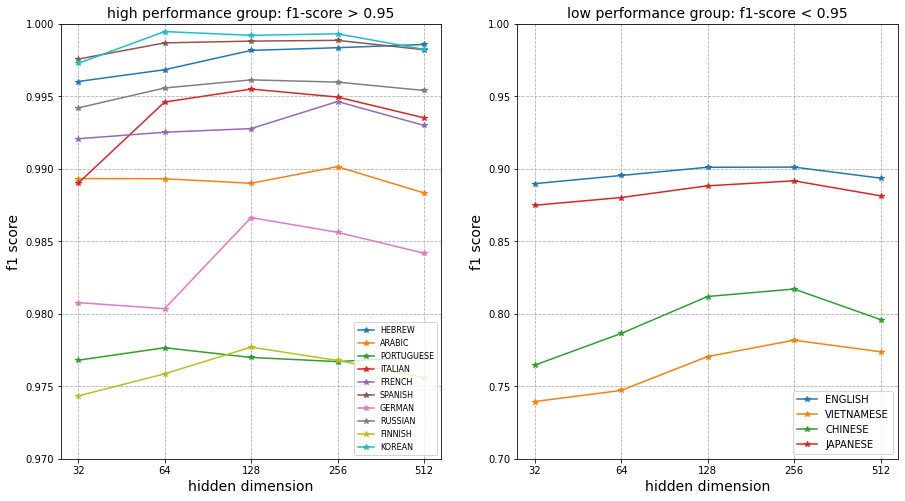

In [6]:
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(15,8))

x = np.array(DF.columns).astype(str)
for lan in list(DF.index):
    if (DF.loc[lan,:] > 0.95).sum() == 5:
        ax[0].plot(x,DF.loc[lan,:],'-*',label = lan)
    else:
        ax[1].plot(x,DF.loc[lan,:],'-*',label = lan)
ax[0].legend(loc=4,fontsize=8);ax[0].grid(True,linestyle='--')
ax[1].legend(loc=4,fontsize=10);ax[1].grid(True,linestyle='--')
ax[0].set_ylim(0.97,1.0)
ax[1].set_ylim(0.70,1.0)
ax[0].set_xlabel('hidden dimension',fontsize=14); ax[0].set_ylabel('f1 score',fontsize=14)
ax[1].set_xlabel('hidden dimension',fontsize=14); ax[1].set_ylabel('f1 score',fontsize=14)
ax[0].set_title('high performance group: f1-score > 0.95',fontsize=14);ax[1].set_title('low performance group: f1-score < 0.95',fontsize=14)
# fig.savefig('hidden.png')

In [49]:
import pandas as pd
df = []
# file_path = f"/Users/qier/MasterThesis_Tokenization/results/2_e{i}.csv"
for i in [32,64,128,256,512,1024,2048,4096]:
    file_path = f'/Users/qier/Downloads/Tagger/2_e{i}.csv'
    df.append(pd.read_csv(file_path).rename(columns={'Unnamed: 0':'language'})[['language','F1-score']])
    
frames = [df[0],df[1]['F1-score'],df[2]['F1-score'],df[3]['F1-score'],df[4]['F1-score'],df[5]['F1-score'],df[6]['F1-score'],df[7]['F1-score']]
DF = pd.concat(frames,axis=1)
DF = DF.set_index('language')
DF.columns = [32,64,128,256,512,1024,2048,4096]

Text(0.5, 1.0, 'low performance group: f1-score < 0.95')

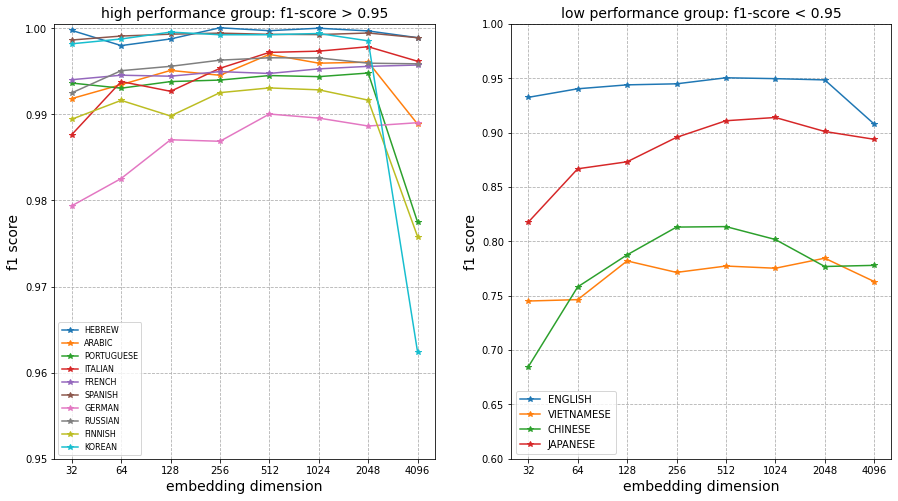

In [52]:
import matplotlib.pyplot as plt
import numpy as np
fig,ax = plt.subplots(1,2,figsize=(15,8))

x = np.array(DF.columns).astype(str)
for lan in list(DF.index):
    if (DF.loc[lan,:] > 0.95).sum() == 8:
        ax[0].plot(x,DF.loc[lan,:],'-*',label = lan)
    else:
        ax[1].plot(x,DF.loc[lan,:],'-*',label = lan)
ax[0].legend(loc=3,fontsize=8);ax[0].grid(True,linestyle='--')
ax[1].legend(loc=3,fontsize=10);ax[1].grid(True,linestyle='--')
ax[0].set_ylim(0.950,1.0005)
ax[1].set_ylim(0.60,1.00)
ax[0].set_xlabel('embedding dimension',fontsize=14); ax[0].set_ylabel('f1 score',fontsize=14)
ax[1].set_xlabel('embedding dimension',fontsize=14); ax[1].set_ylabel('f1 score',fontsize=14)
ax[0].set_title('high performance group: f1-score > 0.95',fontsize=14);ax[1].set_title('low performance group: f1-score < 0.95',fontsize=14)

# plt.savefig('embedding.png')

Compare GL SL ML 

In [275]:
import pandas as pd
s1 = pd.read_csv("/Users/qier/MasterThesis_Tokenization/results/3_SL.csv").rename(columns={'Unnamed: 0':'language'})
s2 = pd.read_csv("/Users/qier/MasterThesis_Tokenization/results/4_GL.csv").rename(columns={'Unnamed: 0':'language'})
s3 = pd.read_csv("/Users/qier/MasterThesis_Tokenization/results/2_e256.csv").rename(columns={'Unnamed: 0':'language'})

s1 = s1[['language','F1-score']].set_index('language')
s2 = s2[['language','F1-score']].set_index('language')
s3 = s3[['language','F1-score']].set_index('language')

In [84]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [278]:
df = pd.concat([s1,s2,s3],axis=1,sort=False)
df.columns = ['SL','GL','ML']

df_sorted = df.reindex(df.mean(axis=1).sort_values().index)
df_sorted

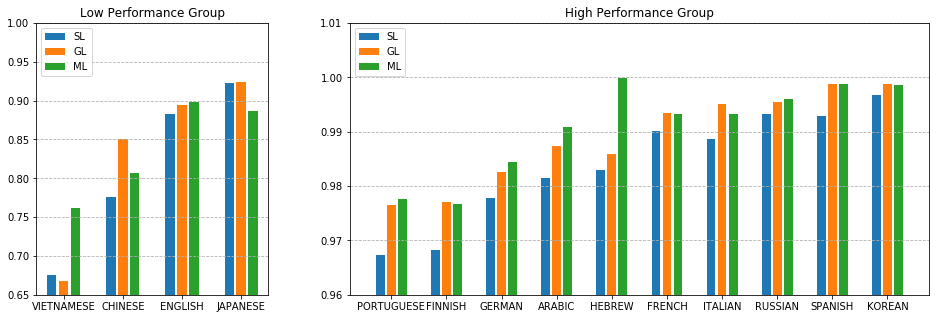

In [442]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
width = np.array([0.5]*4)
x_pos = np.arange(0,4)*5
x={}
x[0]=x_pos-(width * 2)
x[1]=x_pos 
x[2]=x_pos + (width *2)

# plt.plot(figsize=(0.1,0.002)) # does not work
f, ax = plt.subplots(1,2,figsize=(16,5),gridspec_kw={'width_ratios': [1, 2.5]})
ax[0].set_ylim([0.65,1.0])
for t,T in enumerate(df_sorted[0:4].columns):
    ax[0].bar(x[t],df_sorted[0:4][T],label=T)
plt.sca(ax[0])
plt.xticks(x_pos, df_sorted[0:4].index,rotation=0)
ax[0].legend(loc='upper left')
ax[0].grid(ls='--',axis='y')
ax[0].set_title('Low Performance Group')

width = np.array([0.5]*10)
x_pos = np.arange(4,14)*5
x={}
x[0]=x_pos-(width * 2)
x[1]=x_pos 
x[2]=x_pos + (width *2)

# plt.plot(figsize=(0.1,0.002)) # does not work
ax[1].set_ylim([0.96,1.01])
for t,T in enumerate(df_sorted[4:14].columns):
    ax[1].bar(x[t],df_sorted[4:14][T],label=T)
plt.sca(ax[1])
plt.xticks(x_pos, df_sorted[4:14].index,rotation=0)
ax[1].legend(loc='upper left')
ax[1].grid(ls='--',axis='y')
ax[1].set_title('High Performance Group')

plt.savefig('SLGLML_bar.png')

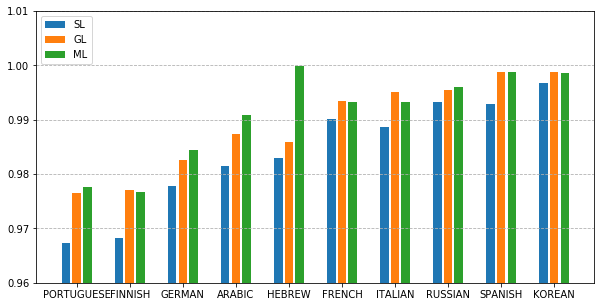

In [418]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
width = np.array([0.5]*10)
x_pos = np.arange(4,14)*5
x={}
x[0]=x_pos-(width * 2)
x[1]=x_pos 
x[2]=x_pos + (width *2)

# plt.plot(figsize=(0.1,0.002)) # does not work
f, ax = plt.subplots(figsize=(10,5))
axes = plt.gca()
axes.set_ylim([0.96,1.01])
for t,T in enumerate(df_sorted[4:14].columns):
    plt.bar(x[t],df_sorted[4:14][T],label=T)
plt.xticks(x_pos, df_sorted[4:14].index,rotation=0)
plt.legend(loc='upper left')
plt.grid(ls='--',axis='y')

In [99]:
df.style.apply(highlight_max,axis=1)

,SL,GL,ML
HEBREW,0.983046,0.985961,0.999824
ARABIC,0.981503,0.987401,0.990924
PORTUGUESE,0.967375,0.976536,0.97762
ITALIAN,0.988722,0.995132,0.993291
FRENCH,0.990103,0.993408,0.993284
SPANISH,0.9929,0.998702,0.99873
GERMAN,0.97784,0.982665,0.984348
ENGLISH,0.883267,0.894218,0.898668
RUSSIAN,0.993349,0.995523,0.995976
FINNISH,0.96826,0.977041,0.976729


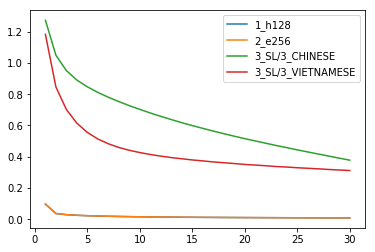

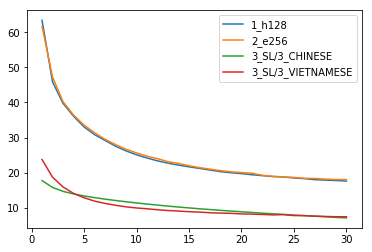

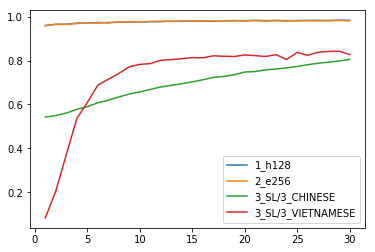

In [55]:
# plot out the loss & Recall/F1 Score along the trining Epochs for a 
import pandas as pd
import matplotlib.pyplot as plt 
path = '/Users/qier/Downloads/ML_Tagger/'
col_names = ['TIMESTAMP','BAD_EPOCHS','LEARNING_RATE','TRAIN_LOSS','DEV_LOSS','DEV_Recall']
model_names = ['1_h128','2_e256','3_SL/3_CHINESE','3_SL/3_VIETNAMESE']

for col in ['TRAIN_LOSS','DEV_LOSS','DEV_Recall']:
    plt.figure()
    for name in model_names:
        a = pd.read_csv(path+name+'/loss.tsv',sep = '\t').dropna(axis=1)
        a.columns=col_names
        plt.plot(a[col],label = name)
    plt.legend()

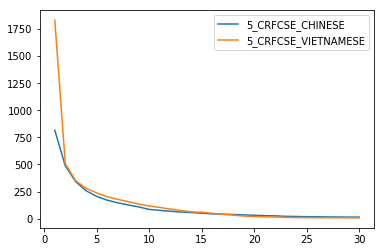

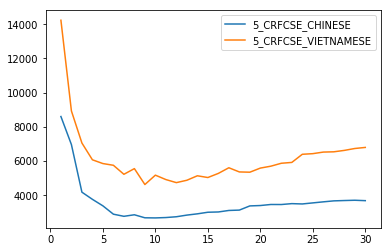

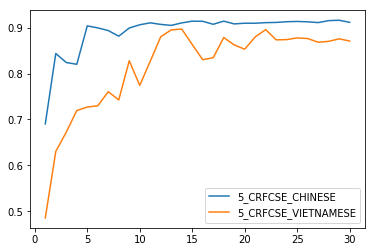

In [74]:
import pandas as pd
import matplotlib.pyplot as plt 
path = '/Users/qier/Downloads/ML_Tagger/'
col_names = ['TIMESTAMP','BAD_EPOCHS','LEARNING_RATE','TRAIN_LOSS','DEV_LOSS','DEV_Recall']
model_names = ['5_CRFCSE_CHINESE','5_CRFCSE_VIETNAMESE']

for col in ['TRAIN_LOSS','DEV_LOSS','DEV_Recall']:
    plt.figure()
    for name in model_names:
        a = pd.read_csv(path+name+'/loss.tsv',sep = '\t').dropna(axis=1)
        a.columns=col_names
        if type(a['DEV_LOSS'][1]) == str:
            a['DEV_LOSS'] = a['DEV_LOSS'].apply(lambda x : float(x[8:17]))
        plt.plot(a[col],label = name)
    plt.legend()

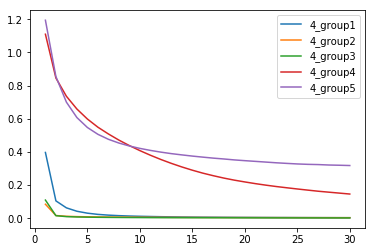

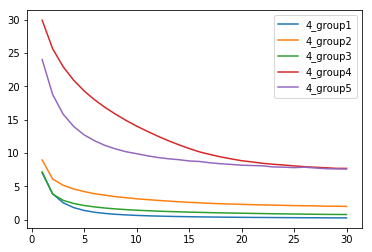

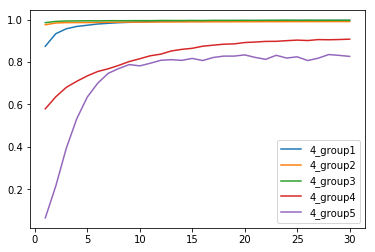

In [75]:
import pandas as pd
import matplotlib.pyplot as plt 
path = '/Users/qier/Downloads/ML_Tagger/'
col_names = ['TIMESTAMP','BAD_EPOCHS','LEARNING_RATE','TRAIN_LOSS','DEV_LOSS','DEV_Recall']
model_names = ['4_group1','4_group2','4_group3','4_group4','4_group5']

for col in ['TRAIN_LOSS','DEV_LOSS','DEV_Recall']:
    plt.figure()
    for name in model_names:
        a = pd.read_csv(path+name+'/loss.tsv',sep = '\t').dropna(axis=1)
        a.columns=col_names
        if type(a['DEV_LOSS'][1]) == str:
            a['DEV_LOSS'] = a['DEV_LOSS'].apply(lambda x : float(x[8:17]))
        plt.plot(a[col],label = name)
    plt.legend()

In [ ]:
# g1 = ['HEBREW','ARABIC']
# g2 = ['PORTUGUESE','ITALIAN','FRENCH','SPANISH','GERMAN','ENGLISH','FINNISH']
# g3 = ['RUSSIAN', 'KOREAN']
# g4 = ['CHINESE','JAPANESE']
# g5 = ['VIETNAMESE']

In [81]:
LanguageList = [
    'HEBREW',
    'ARABIC',
    'PORTUGUESE',
    'ITALIAN',
    'FRENCH',
    'SPANISH',
    'GERMAN',
    'ENGLISH',
    'RUSSIAN',
    'FINNISH',
    'VIETNAMESE',
    'KOREAN',
    'CHINESE',
    'JAPANESE'
]
# ISO 2 Letter Language Codes
LanguageAbb = ['IW','AR','PT','IT','FR','ES','DE','EN','RU','FI','VI','KO','ZH','JA']

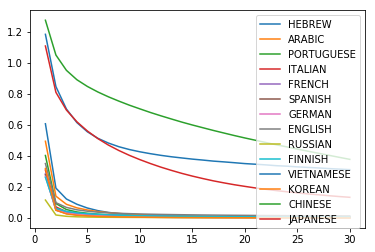

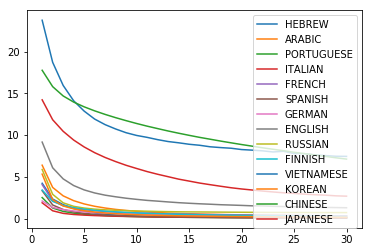

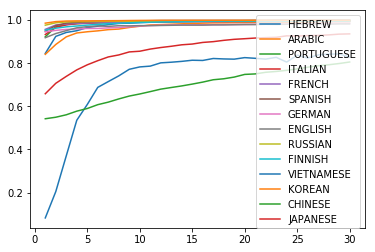

In [78]:
import pandas as pd
import matplotlib.pyplot as plt 
path = '/Users/qier/Downloads/ML_Tagger/3_SL/'
col_names = ['TIMESTAMP','BAD_EPOCHS','LEARNING_RATE','TRAIN_LOSS','DEV_LOSS','DEV_Recall']

for col in ['TRAIN_LOSS','DEV_LOSS','DEV_Recall']:
    plt.figure()
    for name in LanguageList:
        a = pd.read_csv(path+'3_'+name+'/loss.tsv',sep = '\t').dropna(axis=1)
        a.columns=col_names
        if type(a['DEV_LOSS'][1]) == str:
            a['DEV_LOSS'] = a['DEV_LOSS'].apply(lambda x : float(x[8:17]))
        plt.plot(a[col],label = name)
    plt.legend()

Time Costs(in seconds) for each Epoch:
5.724137931 SL(ZH)
15.275862068 GL(ZH+JA)
615.931034482 ML


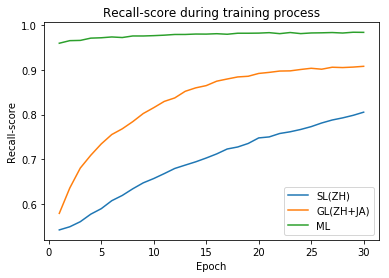

In [127]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
path = '/Users/qier/Downloads/ML_Tagger/'
col_names = ['TIMESTAMP','BAD_EPOCHS','LEARNING_RATE','TRAIN_LOSS','DEV_LOSS','DEV_Recall']
model_names = ['3_SL/3_CHINESE','4_group4','1_h128']
label_names = ['SL(ZH)','GL(ZH+JA)','ML']
plt.figure()
print('Time Costs(in seconds) for each Epoch:')
for i,name in enumerate(model_names):
    a = pd.read_csv(path+name+'/loss.tsv',sep = '\t').dropna(axis=1)
    a.columns=col_names
    # print time cost
    a_time = a.TIMESTAMP.apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S'))
    a_time_diff = [(a_time[k] - a_time[k-1]) for k in np.arange(2,len(a_time)+1)]
    print(np.mean(a_time_diff).total_seconds(),label_names[i])
    #plot Dev Recall score 
    plt.plot(a['DEV_Recall'],label = label_names[i])
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Recall-score')
plt.title('Recall-score during training process')
plt.savefig('SLGLML_Recall.png')

CHINESE : time costs(in seconds) for each Epoch:
5.724137931 SL(256)
56.379310344 SL_CSE(4096)
566.931034482 SL_CRF(256)
562.448275862 SL_CRF(4096)
583.862068965 SL_CRF+CSE(4096)


VIETNAMESE : time costs(in seconds) for each Epoch:
4.103448275 SL(256)
33.896551724 SL_CSE(4096)
470.571428571 SL_CRF(256)
480.172413793 SL_CRF(4096)
473.785714285 SL_CRF+CSE(4096)




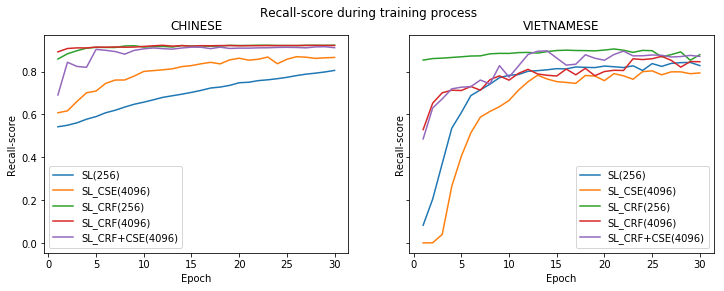

In [257]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

path = '/Users/qier/Downloads/ML_Tagger/'
col_names = ['TIMESTAMP','BAD_EPOCHS','LEARNING_RATE','TRAIN_LOSS','DEV_LOSS','DEV_Recall']
# model_names = ['3_SL/3_CHINESE','4_group4','1_h128','5_CRFCSE_CHINESE']
# label_names = ['SL(ZH)','GL(ZH+JA)','ML','SL_CRFCSE(ZH)']
# plt.figure()

fig,axs = plt.subplots(1,2,figsize=[12,4],sharey=True)
for l,L in enumerate([('CHINESE','ZH'),('VIETNAMESE','VI')]):
    # plt.figure()
    model_names = [
                   '3_SL/3_%s'%L[0],
                   '5_CSE_%s'%L[0],
                   '5_CRF_256_%s'%L[0],
                   '5_CRF_%s'%L[0],
                   '5_CRFCSE_%s'%L[0]
                   ]
    label_names = ['SL(256)','SL_CSE(4096)','SL_CRF(256)','SL_CRF(4096)','SL_CRF+CSE(4096)']

    print(L[0],': time costs(in seconds) for each Epoch:')
    for i,name in enumerate(model_names):
        a = pd.read_csv(path+name+'/loss.tsv',sep = '\t').dropna(axis=1)
        a.columns=col_names
        # print time cost
        a_time = a.TIMESTAMP.apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S'))
        a_time_diff = [(a_time[k] - a_time[k-1]) for k in np.arange(2,len(a_time)+1)]
        for ele in a_time_diff: # get rid of some overnight timestamp
            if ele.total_seconds() < 0: a_time_diff.remove(ele)
        print(np.mean(a_time_diff).total_seconds(),label_names[i])
        #plot Dev Recall score 
        axs[l].plot(a['DEV_Recall'],label = label_names[i])
    print('\n')
    axs[l].legend()
    axs[l].set_title(L[0])
# plt.xlabel('Epoch')
# plt.set_ylabel('Recall-score')
fig.suptitle('Recall-score during training process')
for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Recall-score')


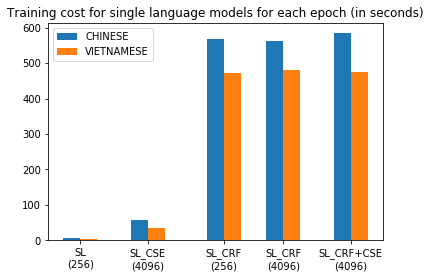

In [273]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

path = '/Users/qier/Downloads/ML_Tagger/'
col_names = ['TIMESTAMP','BAD_EPOCHS','LEARNING_RATE','TRAIN_LOSS','DEV_LOSS','DEV_Recall']
width = np.array([0.1]*5)
x_pos = np.array([0,0.4,0.85,1.2,1.6])
x={}
x[0]=x_pos-width/2
x[1]=x_pos+width/2
plt.plot()
obj={}
for l,L in enumerate([('CHINESE','ZH'),('VIETNAMESE','VI')]):
    model_names = [
                   '3_SL/3_%s'%L[0],
                   '5_CSE_%s'%L[0],
                   '5_CRF_256_%s'%L[0],
                   '5_CRF_%s'%L[0],
                   '5_CRFCSE_%s'%L[0]
                   ]
    label_names = ['SL\n(256)','SL_CSE\n(4096)','SL_CRF\n(256)','SL_CRF\n(4096)','SL_CRF+CSE\n(4096)']
    obj[L[0]]=[]
    for i,name in enumerate(model_names):
        a = pd.read_csv(path+name+'/loss.tsv',sep = '\t').dropna(axis=1)
        a.columns=col_names
        # print time cost
        a_time = a.TIMESTAMP.apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S'))
        a_time_diff = [(a_time[k] - a_time[k-1]) for k in np.arange(2,len(a_time)+1)]
        for ele in a_time_diff: # get rid of some overnight timestamp
            if ele.total_seconds() < 0: a_time_diff.remove(ele)
        obj[L[0]].append(np.mean(a_time_diff).total_seconds())
    
    plt.bar(x[l],obj[L[0]],width=width[l],label = L[0])
    plt.xticks(x_pos, label_names,rotation=0)
plt.legend()
plt.title('Training cost for single language models for each epoch (in seconds)')
plt.savefig('Training_cost1_bar.png')

Text(0, 0.5, 'training time (secoonds)')

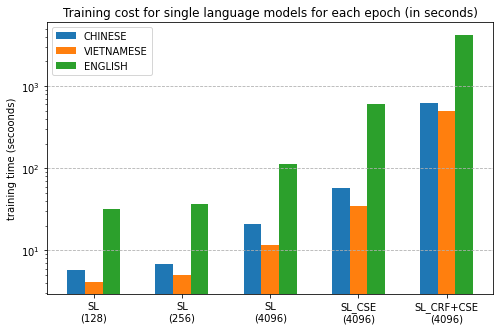

In [221]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

path = '/Users/qier/Downloads/Tagger/'
col_names = ['TIMESTAMP','BAD_EPOCHS','LEARNING_RATE','TRAIN_LOSS','DEV_LOSS','DEV_Recall']
# x_pos = np.array([0,0.4,0.85,1.2,1.6])
x_pos = np.array([1,1.5,2,2.5,3])
x={}
x[0]=x_pos-0.1
x[1]=x_pos
x[2]=x_pos+0.1
obj={}
plt.figure(figsize=[8,5])
lans = ['VIETNAMESE','CHINESE','ENGLISH']
for k,lan in enumerate(lans):
    model_names = [ f'5/{lan}_128',
                    f'5/{lan}_256',
                    f'5/{lan}_4096',
                    f'5/{lan}_CSE',
                    f'5/5_CRFCSE_{lan}',
                    ]
    # label_names = ['SL\n(256)','SL_CSE\n(4096)','SL_CRF\n(256)','SL_CRF\n(4096)','SL_CRF+CSE\n(4096)']
    label_names = ['SL\n(128)','SL\n(256)','SL\n(4096)','SL_CSE\n(4096)','SL_CRF+CSE\n(4096)']
    
    obj[lans[k]]=[]
    for i,name in enumerate(model_names):
        a = pd.read_csv(path+name+'/loss.tsv',sep = '\t').dropna(axis=1)
        a.columns=col_names

        a_time = a.TIMESTAMP.apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S'))
        a_time_diff = [(a_time[k] - a_time[k-1]) for k in np.arange(2,len(a_time)+1)]
        
        for ele in a_time_diff: # get rid of some overnight timestamp
            if ele.total_seconds() < 0: a_time_diff.remove(ele)
        obj[lans[k]].append(np.mean(a_time_diff).total_seconds())
    
    plt.bar(x[k],obj[lans[k]],width=0.1,label = lan,log=True)
    plt.xticks(x_pos, label_names,rotation=0)
    plt.grid(ls='--',axis='y')

plt.legend()
plt.title('Training cost for single language models for each epoch (in seconds)')
plt.ylabel('training time (secoonds)')

In [168]:
import pandas as pd
to_plot = pd.read_csv('/Users/qier/MasterThesis_Tokenization/results/3_SL.csv',index_col=0)[['F1-score']]
to_plot['Train_Size'] = pd.read_csv('/Users/qier/MasterThesis_Tokenization/data/datasets_size.csv',index_col=0)['train']
to_plot = to_plot.sort_values(by='Train_Size')

In [169]:
to_plot

,F1-score,Train_Size
VIETNAMESE,0.662952,1400
CHINESE,0.764589,3997
HEBREW,0.981172,5241
ARABIC,0.979612,6075
JAPANESE,0.910160,7027
PORTUGUESE,0.970780,8328
FINNISH,0.961669,12217
ENGLISH,0.889605,12543
ITALIAN,0.986550,13121
GERMAN,0.977681,13814


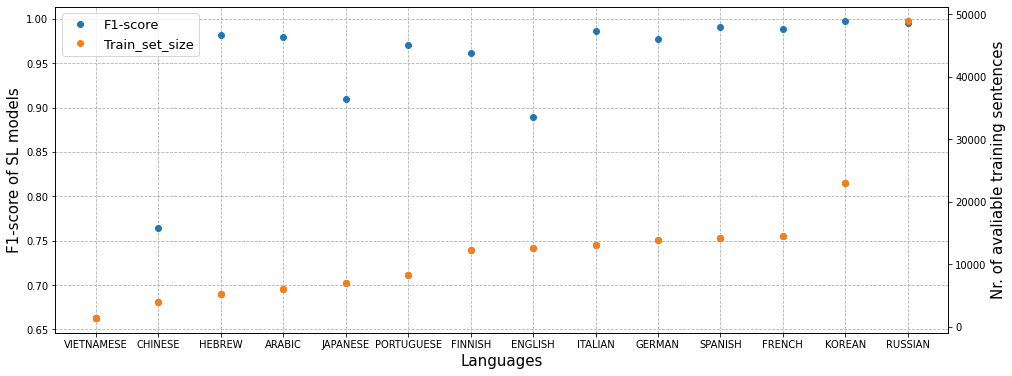

In [178]:
import matplotlib.pyplot as plt 
import numpy as np
fig,ax = plt.subplots(figsize=[16,6])
ax.plot(to_plot['F1-score'],'o',label='F1')
ax.set_ylabel("F1-score of SL models",fontsize=15)
ax.grid(ls='--')
ax.set_xlabel("Languages",fontsize=15)


ax2=ax.twinx()
ax2.plot(to_plot['Train_Size'],'o',label='F1-score')
ax2.plot(to_plot['Train_Size'],'o',label='Train_set_size')
ax2.set_ylabel("Nr. of avaliable training sentences",fontsize=15)
y2 = to_plot['Train_Size']


plt.legend(fontsize=13)
plt.show()

In [187]:
to_plot['Train_Size']

VIETNAMESE     1400
CHINESE        3997
HEBREW         5241
ARABIC         6075
JAPANESE       7027
PORTUGUESE     8328
FINNISH       12217
ENGLISH       12543
ITALIAN       13121
GERMAN        13814
SPANISH       14187
FRENCH        14449
KOREAN        23010
RUSSIAN       48814
Name: Train_Size, dtype: int64

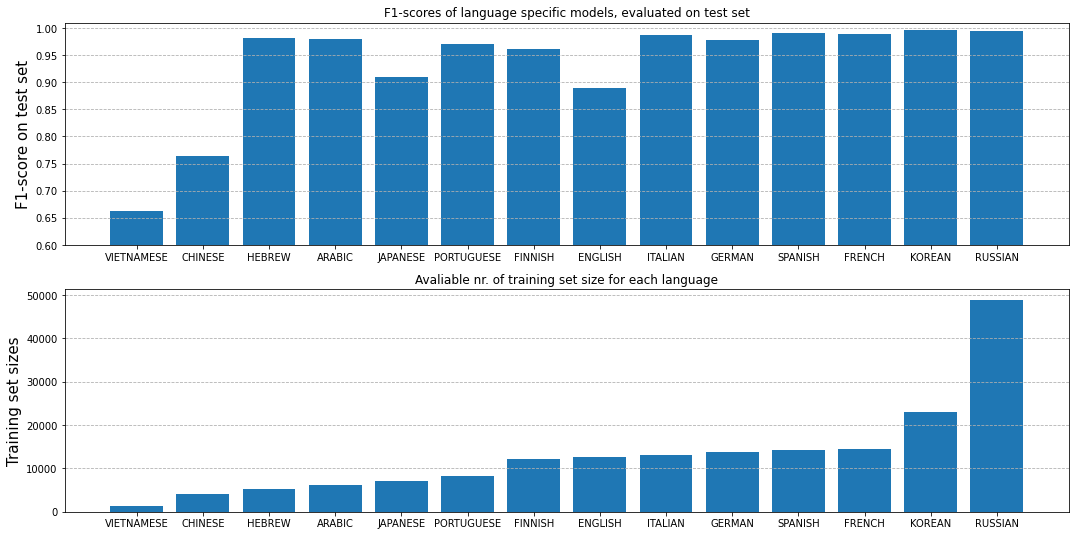

In [205]:
import matplotlib.pyplot as plt 
import numpy as np
fig,ax = plt.subplots(2,1,figsize=[18,9])
ax[0].bar(to_plot.index,to_plot['F1-score'])
ax[0].set_ylabel("F1-score on test set",fontsize=15)
ax[1].bar(to_plot.index,to_plot['Train_Size'])
ax[1].set_ylabel("Training set sizes",fontsize=15)

ax[0].set_ylim(0.6,1.01)
ax[0].grid(ls='--',axis='y');ax[1].grid(ls='--',axis='y')

ax[0].set_title('F1-scores of language specific models, evaluated on test set')
ax[1].set_title('Avaliable nr. of training set size for each language')

# ax[0].xlabel('')
plt.show()

In [62]:
df

,Unnamed: 0,F1-score,Precision-score,Recall-score
0,"('RUSSIAN', 1000)",0.920043,0.967899,0.880156
1,"('KOREAN', 1000)",0.978826,0.989297,0.970628
2,"('RUSSIAN', 5000)",0.956004,0.987665,0.932020
3,"('KOREAN', 5000)",0.990154,0.996627,0.985495
4,"('RUSSIAN', 9000)",0.978892,0.991832,0.969757
5,"('KOREAN', 9000)",0.990813,0.997116,0.986285
6,"('RUSSIAN', 13000)",0.981215,0.991667,0.973753
7,"('KOREAN', 13000)",0.992673,0.997295,0.989131
8,"('RUSSIAN', 17000)",0.987678,0.993251,0.983412
9,"('KOREAN', 17000)",0.992311,0.997113,0.988984


(0.9, 1.0)

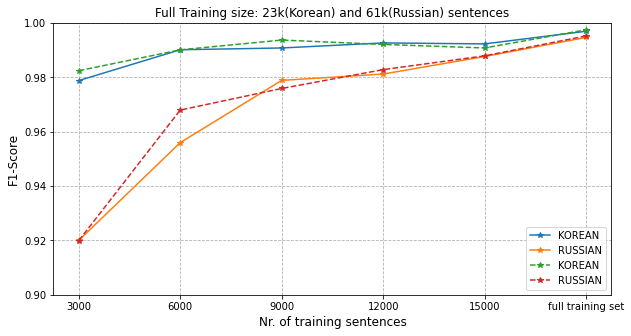

In [82]:
df = pd.read_csv('/Users/qier/MasterThesis_Tokenization/results/6_SL_downsized2.csv')
df_bm = pd.read_csv('/Users/qier/MasterThesis_Tokenization/results/3_SL.csv',index_col=0)

df2 = pd.read_csv('/Users/qier/MasterThesis_Tokenization/results/6_SL_downsized2_drop.csv')
df_bm2 = pd.read_csv('/Users/qier/MasterThesis_Tokenization/results/3_SL_drop.csv',index_col=0)

R = df.iloc[[0,2,4,6,8],:]['F1-score']
R2 = df2.iloc[[0,2,4,6,8],:]['F1-score']
R = list(R.values)
R2 = list(R2.values)
R.append(df_bm['F1-score']['RUSSIAN'])
R2.append(df_bm2['F1-score']['RUSSIAN'])

K = df.iloc[[1,3,5,7,9],:]['F1-score']
K2 = df2.iloc[[1,3,5,7,9],:]['F1-score']
K = list(K.values)
K2 = list(K2.values)
K.append(df_bm['F1-score']['KOREAN'])
K2.append(df_bm2['F1-score']['KOREAN'])

import numpy as np
N = list(np.array([1,2,3,4,5])*3000)
N.append('full training set')
plt.figure(figsize=[10,5])
plt.plot(N,K,'-*',label='KOREAN')
plt.plot(N,R,'-*',label='RUSSIAN')

plt.plot(N,K2,'--*',label='KOREAN')
plt.plot(N,R2,'--*',label='RUSSIAN')


plt.legend()
plt.grid(ls='--')
plt.xlabel('Nr. of training sentences',fontsize=12)
plt.ylabel('F1-Score',fontsize=12)
plt.title('Full Training size: 23k(Korean) and 61k(Russian) sentences')
plt.ylim(0.90,1.0)

(0.9, 1.0)

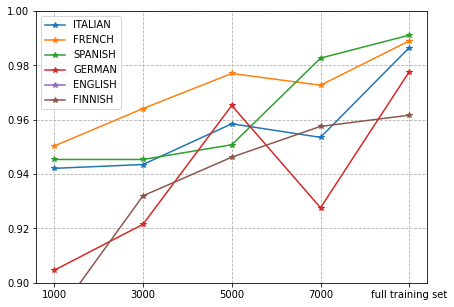

In [64]:
df = pd.read_csv('/Users/qier/MasterThesis_Tokenization/results/SL_6L_downsized.csv',index_col=0)
df_bm = pd.read_csv('/Users/qier/MasterThesis_Tokenization/results/3_SL.csv',index_col=0)

LanguageList = [
    'ITALIAN',
    'FRENCH',
    'SPANISH',
    'GERMAN',
    'ENGLISH',
    'FINNISH',
]
lan_f1 = {}
for lan in LanguageList:
    lan_f1[lan] = []
    for idx in df.index:
        if lan in idx:
            lan_f1[lan].append(df.loc[idx,'F1-score'])
for lan in LanguageList:
    lan_f1[lan].append(df_bm['F1-score'][lan])

N = list(np.array([1,3,5,7])*1000)
N.append('full training set')
plt.figure(figsize=[7,5])
index_nums = [0,2,4,6,7]
for lan in LanguageList:
    # plt.plot(N,lan_f1[lan],label = lan)
    plt.plot(N,[lan_f1[lan][val] for val in index_nums],'-*',label = lan)

plt.legend()
plt.grid(ls='--')
plt.ylim(0.90,1.0)

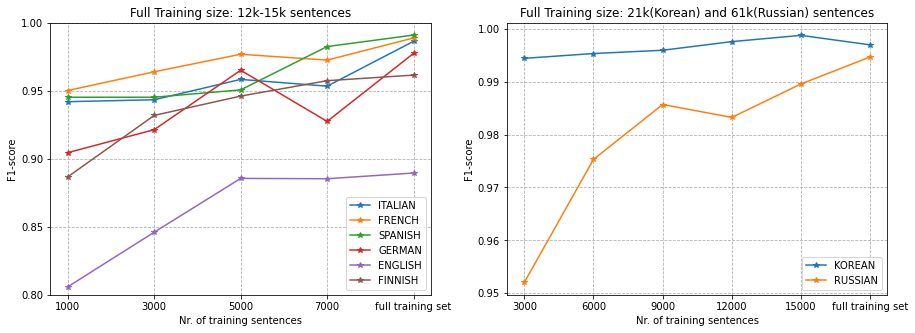

In [15]:
f,ax = plt.subplots(1,2,figsize=[15,5])

N = list(np.array([1,3,5,7])*1000)
N.append('full training set')
index_nums = [0,2,4,6,7]
for lan in LanguageList:
    ax[0].plot(N,[lan_f1[lan][val] for val in index_nums],'-*',label = lan)
ax[0].legend()
ax[0].set_title('Full Training size: 12k-15k sentences')

N = list(np.array([1,3,5,7,9,11])*1000)
N.append('full training set')
ax[1].plot(N,K,'-*',label='KOREAN')
ax[1].plot(N,R,'-*',label='RUSSIAN')
ax[1].legend()
ax[1].set_title('Full Training size: 21k(Korean) and 61k(Russian) sentences')

ax[0].grid(ls='--')
ax[1].grid(ls='--')

ax[0].set_ylim(0.8,1.0)
ax[0].set_yticks(np.arange(0.8,1.05, 0.05))

for axs in ax.flat:
    axs.set(xlabel='Nr. of training sentences', ylabel='F1-score')

# fig.savefig('Train_vs_f1.png')

Text(0.5, 1.0, 'Full Training size: 13k-15k sentences')

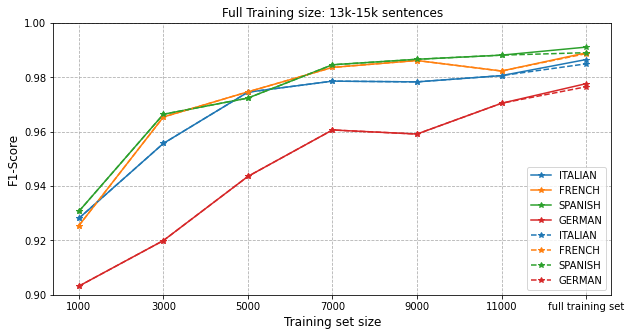

In [81]:
df = pd.read_csv('/Users/qier/MasterThesis_Tokenization/results/6_SL_downsized.csv',index_col=0)
df_bm = pd.read_csv('/Users/qier/MasterThesis_Tokenization/results/3_SL.csv',index_col=0)
df2 = pd.read_csv('/Users/qier/MasterThesis_Tokenization/results/6_SL_downsized_drop.csv',index_col=0)
df_bm2 = pd.read_csv('/Users/qier/MasterThesis_Tokenization/results/3_SL_drop.csv',index_col=0)

LanguageList = [
    'ITALIAN',
    'FRENCH',
    'SPANISH',
    'GERMAN',
    # 'ENGLISH',
    # 'FINNISH',
]

colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']

# original 
lan_f1 = {}
for lan in LanguageList:
    lan_f1[lan] = []
    for idx in df.index:
        if lan in idx:
            lan_f1[lan].append(df.loc[idx,'F1-score'])
for lan in LanguageList:
    lan_f1[lan].append(df_bm['F1-score'][lan])
# dotted line
lan_f2 = {}
for lan in LanguageList:
    lan_f2[lan] = []
    for idx in df.index:
        if lan in idx:
            lan_f2[lan].append(df.loc[idx,'F1-score'])
for lan in LanguageList:
    lan_f2[lan].append(df_bm2['F1-score'][lan])

N = list(np.array([1,3,5,7,9,11])*1000)
N.append('full training set')
plt.figure(figsize=[10,5])
index_nums = [0,1,2,3,4,5,6]
for lan in LanguageList:
    plt.plot(N,[lan_f1[lan][val] for val in index_nums],'-*',label = lan)
for i,lan in enumerate(LanguageList):
    plt.plot(N,[lan_f2[lan][val] for val in index_nums],'--*',label = lan,c=colors[i])

plt.ylim(0.90,1.0)
plt.legend(loc='lower right')
plt.grid(ls='--')
plt.ylabel('F1-Score',fontsize = 12)
plt.xlabel('Training set size',fontsize = 12)
plt.title('Full Training size: 13k-15k sentences')

In [20]:
colors = ['#1f77b4','#ff7f0e','2ca02c','d62728']

7

CHINESE : time costs(in seconds) for each Epoch:
5.75862 embed dim = 128
6.931034 embed dim = 256
20.724137 embed dim = 4096
58.37931 embed type = CSE(dim = 4096)




Text(0, 0.5, 'F1-Score on development set')

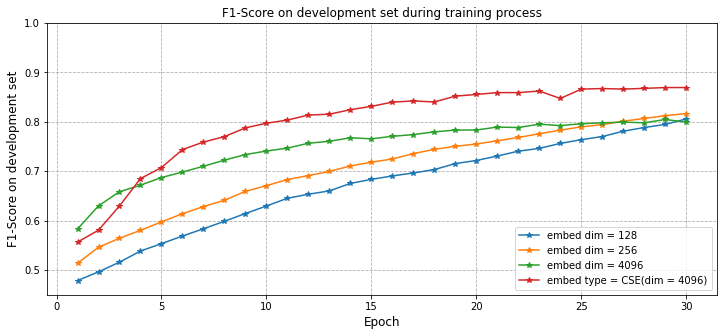

In [101]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
path = '/Users/qier/Downloads/Tagger/'
col_names = ['TIMESTAMP','BAD_EPOCHS','LEARNING_RATE','TRAIN_LOSS','DEV_LOSS','DEV_F1_Score']
plt.figure(figsize=[12,5])
lan = 'CHINESE'
model_names = [ f'5/{lan}_128',
                f'5/{lan}_256',
                f'6/4096_{lan}',
                f'5/{lan}_CSE',
                ]
label_names = ['embed dim = 128','embed dim = 256','embed dim = 4096','embed type = CSE(dim = 4096)']

print(lan,': time costs(in seconds) for each Epoch:')
for i,name in enumerate(model_names):
    a = pd.read_csv(path+name+'/loss.tsv',sep = '\t').dropna(axis=1)
    a.columns=col_names
    # print time cost
    a_time = a.TIMESTAMP.apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S'))
    a_time_diff = [(a_time[k] - a_time[k-1]) for k in np.arange(2,len(a_time)+1)]
    for ele in a_time_diff: # get rid of some overnight timestamp
        if ele.total_seconds() < 0: a_time_diff.remove(ele)
    print(np.mean(a_time_diff).total_seconds(),label_names[i])
    #plot Dev Recall score 
    plt.plot(a['DEV_F1_Score'],'-*',label = label_names[i])
print('\n')
plt.legend(loc = 'lower right')
plt.title(lan)
plt.grid(ls='--')
plt.title('F1-Score on development set during training process')
plt.ylim(0.45,1.0)
plt.xlabel('Epoch',fontsize=12)
plt.ylabel('F1-Score on development set',fontsize=12)

CHINESE : time costs(in seconds) for each Epoch:
5.75862 embed dim = 128
6.931034 embed dim = 256
20.724137 embed dim = 4096
58.37931 embed type = CSE(dim = 4096)
627.241379 CRF + CSE(dim = 4096)
VIETNAMESE : time costs(in seconds) for each Epoch:
4.137931 embed dim = 128
5.0 embed dim = 256
11.551724 embed dim = 4096
34.724137 embed type = CSE(dim = 4096)
500.678571 CRF + CSE(dim = 4096)
ENGLISH : time costs(in seconds) for each Epoch:
31.689655 embed dim = 128
36.75862 embed dim = 256
112.689655 embed dim = 4096
611.344827 embed type = CSE(dim = 4096)
4220.392857 CRF + CSE(dim = 4096)


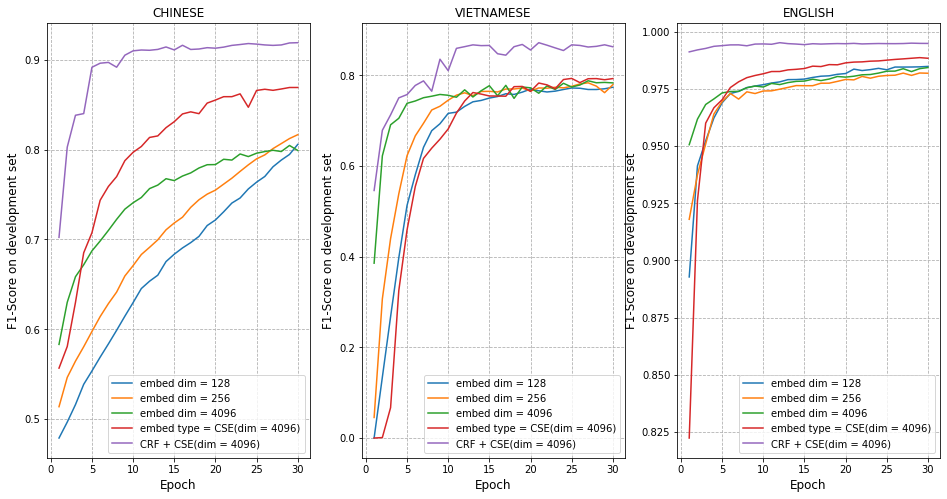

In [167]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
path = '/Users/qier/Downloads/Tagger/'
col_names = ['TIMESTAMP','BAD_EPOCHS','LEARNING_RATE','TRAIN_LOSS','DEV_LOSS','DEV_F1_Score']
# lans = ['CHINESE','JAPANESE','VIETNAMESE','ENGLISH']
lans1 = ['CHINESE','VIETNAMESE','ENGLISH']
fig,ax = plt.subplots(1,3,figsize = [16,8])

for k,lan in enumerate(lans1):
    model_names = [ f'5/{lan}_128',
                    f'5/{lan}_256',
                    f'5/{lan}_4096',
                    f'5/{lan}_CSE',
                    f'5/5_CRFCSE_{lan}',
                    ]
    label_names = ['embed dim = 128','embed dim = 256','embed dim = 4096','embed type = CSE(dim = 4096)','CRF + CSE(dim = 4096)']

    print(lan,': time costs(in seconds) for each Epoch:')
    for i,name in enumerate(model_names):
        a = pd.read_csv(path+name+'/loss.tsv',sep = '\t').dropna(axis=1)
        a.columns=col_names
        # print time cost
        a_time = a.TIMESTAMP.apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S'))
        a_time_diff = [(a_time[k] - a_time[k-1]) for k in np.arange(2,len(a_time)+1)]
        for ele in a_time_diff: # get rid of some overnight timestamp
            if ele.total_seconds() < 0: a_time_diff.remove(ele)
        print(np.mean(a_time_diff).total_seconds(),label_names[i])
        #plot Dev Recall score 
        ax[k].plot(a['DEV_F1_Score'],'-',label = label_names[i])
    ax[k].legend(loc = 'lower right')
    ax[k].set_title(lan)
    ax[k].grid(ls='--')
    ax[k].set_title(lan)
    # ax[k].set_ylim(0.45,1.0)
    ax[k].set_ylabel('F1-Score on development set',fontsize=12)
    ax[k].set_xlabel('Epoch',fontsize=12)